<a href="https://colab.research.google.com/github/fclemos/DS_Portfolio/blob/master/DesafioIGTI_Mod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS*

Utilização do kmeans para analise de dados e identificação de clusters da base de dados customers.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

*FAÇA O UPLOAD DO DATASET Mall_Customers.csv PARA O GOOGLE COLAB*


In [16]:
#Se necessário, troque o caminho do arquivo.

df = pd.read_csv('/content/drive/MyDrive/Arquivos para estudos/Consumo.csv', sep=',', encoding='1252')
df.head()

,Cod,Sexo,Idade,Salario Anual (milhares),Score Gastos (0-100)
0,1,Masculino,19,17,39
1,2,Masculino,21,17,81
2,3,Feminino,20,19,6
3,4,Feminino,23,19,77
4,5,Feminino,31,20,40


In [17]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=d7d5c7fc2ee4e3db0490a3188c6cb5b3f13b39be6aa7d1360f89304fc0ffd0ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-sqatnqn8/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [18]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='Relatorio - Pandas Profiling', html={'style':{'full_width':True}})
profile

In [ ]:
profile.to_file(output_file='Desafio_Mod1.html')

**PLOTANDO O GRÁFICO DE RENDA X PONTUAÇÃO**

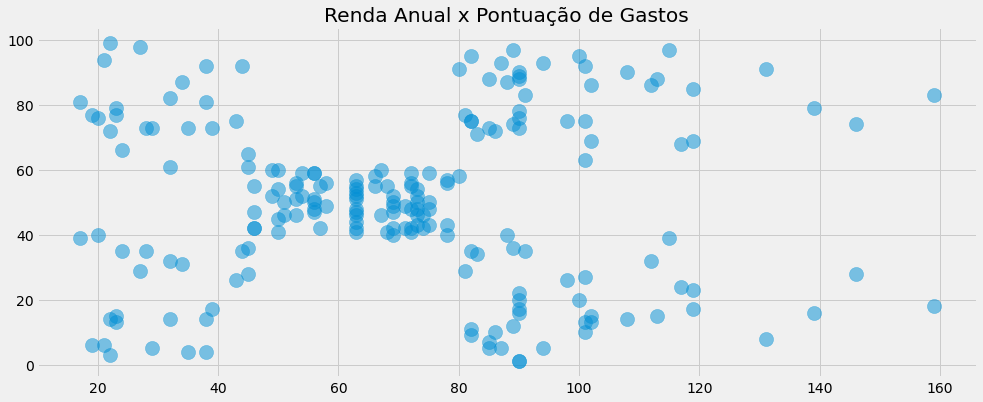

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x= 'Salario Anual (milhares)', y= 'Score Gastos (0-100)', data= df, s=200, alpha=0.5)
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

**EXECUÇÃO DO KMEANS COM 2 CLUSTERS**

<function matplotlib.pyplot.show>

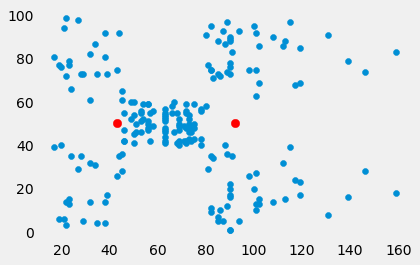

In [20]:
x2 = df[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x2)

plt.scatter(x2[:,0], x2[:,1])
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show

#Insira aqui o código que executa o algoritmo k-means com 2 clusters.

**EXECUÇÃO DO KMEANS COM 6 CLUSTERS**

<function matplotlib.pyplot.show>

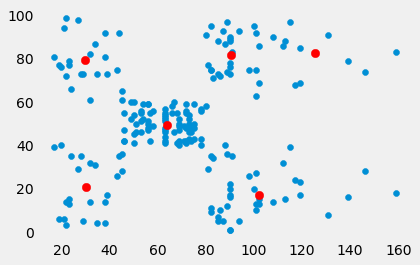

In [23]:
#Insira aqui o código que executa o algoritmo k-means com 6 clusters.

x2 = df[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x2)

plt.scatter(x2[:,0], x2[:,1])
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show


*EXIBIÇÃO DA CURVA DO COTOVELO, MOSTRANDO AS ITERAÇÕES E O NÚMERO IDEAL DE CLUSTERS*

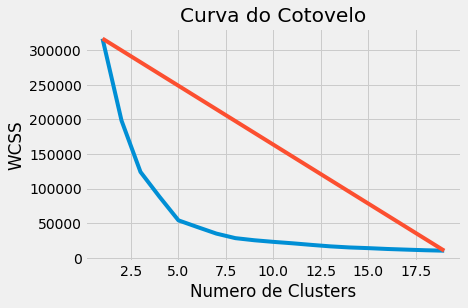

In [25]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Curva do Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()


In [26]:
     
# O numero de clusters
print ('A o número de clusters é: ', kmeans.n_clusters) #traz os numeros de clusters

# Coordenada do ponto
print ('A coordenada de cada centróide é: ', kmeans.cluster_centers_) 

# Soma dos quadrados intra-clsters
print('A soma dos quadrados intra-clusters (wcss) do centroíde é: ', kmeans.inertia_)

A o número de clusters é:  19
A coordenada de cada centróide é:  [[ 72.53846154  56.23076923]
 [ 87.69230769   9.15384615]
 [ 26.          34.42857143]
 [ 37.71428571  72.85714286]
 [143.75        81.75      ]
 [108.46153846  20.15384615]
 [ 63.44444444  48.94444444]
 [ 87.81818182  90.36363636]
 [ 28.41666667   9.58333333]
 [ 72.7         44.55      ]
 [143.75        17.5       ]
 [108.75        89.875     ]
 [ 31.          93.66666667]
 [ 22.77777778  74.88888889]
 [108.          68.8       ]
 [ 52.41666667  53.08333333]
 [ 45.57142857  35.71428571]
 [ 86.90909091  74.45454545]
 [ 87.75        32.125     ]]
A soma dos quadrados intra-clusters (wcss) do centroíde é:  10368.500782550782


**EXECUÇÃO DO KMEANS COM O NÚMERO IDEAL DE CLUSTERS**

A o número de clusters é:  5
[[102.11428571  17.11428571]
 [ 64.09876543  49.51851852]
 [100.17948718  82.12820513]
 [ 30.43478261  20.91304348]
 [ 29.77272727  79.36363636]]
54185.05318347782


<function matplotlib.pyplot.show>

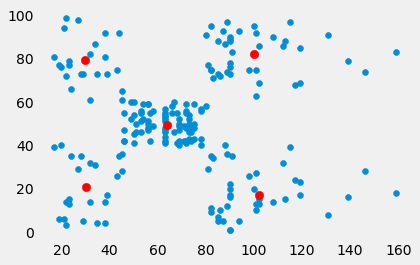

In [30]:
#Insira aqui o código que executa o algoritmo k-means com o número ideal de clusters
x2 = df[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x2)

# O numero de clusters
print ('A o número de clusters é: ', kmeans.n_clusters) #traz os numeros de clusters

# Coordenada do ponto
print(kmeans.cluster_centers_)

# Soma dos quadrados intra-clsters
print(kmeans.inertia_)

plt.scatter(x2[:,0], x2[:,1])
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show